## Project Goals
In this guided project we'll practice machine learning workflow to predict a car's market price using its attributes. The dataset we will be working with contains information on various cars. For each car, there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, fuel economy, acceleration stats, etcetera. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and it can be directly downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

Here's a preview of the dataset:

In [1]:
import pandas as pd
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style','drive_wheels',
           'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
           'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg',
           'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names = columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Here are the descriptions for each column in the dataset as indicated by the database source.

Attribute Information and Range:

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized_losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel_type: diesel, gas. 
5. aspiration: std, turbo. 
6. num_doors: four, two. 
7. body_style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive_wheels: 4wd, fwd, rwd. 
9. engine_location: front, rear. 
10. wheel_base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb_weight: continuous from 1488 to 4066. 
15. engine_type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num_cylinders: eight, five, four, six, three, twelve, two. 
17. engine_size: continuous from 61 to 326. 
18. fuel_system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak_rpm: continuous from 4150 to 6600. 
24. city_mpg: continuous from 13 to 49. 
25. highway_mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

## Data Selection and Cleaning

Using the atribute data, we will select columns with continuous values for our data modeling.

From the dataset preview, we can see that there are some question marks in the `normalized_losses` column. As we generally dont want missing values in predictive modeling, we will remove these symbols and check for missing values elsewhere in the dataset.

In [2]:
column_selection = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 
                    'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars_1 = cars[column_selection]
cars_1.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


From the dataset preview, we can see that there are some question marks in the `normalized_losses` column. As we generally don't want missing values in predictive modeling, we will remove these symbols and check for missing values elsewhere in the dataset.

In [3]:
# replacing ? with null values
import numpy as np
cars_1 = cars_1.replace('?', np.nan)
cars_1.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#Checking for other null values and for column data types
cars_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_rate     205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


We need all columns to be numeric types so we will convert the dataset values to `float`.

In [5]:
cars_1 = cars_1.astype('float')
# number of values that are null
cars_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_rate     205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


Our target column is the `price` column which has 4 null values. We will remove the rows where the price value is null. We will also remove the null values in the `bore`, `stroke`, `horespower`, and `peak_rpm` columns as there are 4 or less null values in each of those columns

In [6]:
# dropping rows where the value in `price` is null
cars_1 = cars_1.dropna(axis = 0, subset = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm'])

# data check
cars_1.isnull().sum()

normalized_losses    35
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  0
stroke                0
compression_rate      0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

There are 35 remaining null values in the `normalized_losses` column. As this represents a good portion of the data, we will replace the null values in the `normalized_losses` column with the column mean.

In [7]:
cars_1 = cars_1.fillna(cars_1.mean())
# data check
cars_1.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Next we will normalize all of the values in each columns to the Standard Normal Distribution. This will prevent any single value in our columns from having too much of an impact on the Euclidean Distance we will be calculating. However, we want to preserve the values in the `price` column as this is the value we will be predicting.

In [8]:
cars_2 = (cars_1 - cars_1.mean())/(cars_1.std())
cars_2['price'] = cars_1['price']
#data check
cars_2.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.763612e-15,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,13495.0
1,1.763612e-15,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,16500.0
2,1.763612e-15,-0.716957,-0.245016,-0.181082,-0.609793,0.503130,-2.388623,0.699402,-0.294176,1.339545,-0.212456,-0.995779,-0.708860,16500.0
3,1.324801e+00,0.147356,0.187800,0.147174,0.182938,-0.423086,-0.512697,0.476553,-0.047998,-0.033583,0.855301,-0.214697,-0.123149,13950.0
4,1.324801e+00,0.082124,0.187800,0.240961,0.182938,0.505035,-0.512697,0.476553,-0.540353,0.309699,0.855301,-1.151995,-1.294570,17450.0


Our data (`cars_2`) now appears to be ready for k-nearest neighbors modeling.

## Univariate K-Nearest Neighbors Model
We will begin with a simple univariate model before moving to more complex models to help structure the code workflow and understand the features better.

We will create a function named `knn_train_test()` that encapsulates the training and simple validation process. This function will have 3 parameters:
- training column name
- target column name
- the dataframe object

This function will:
- randomize the dataset
- split the data set into a training and test set
    - using 75% for training and %25 for testing
- instantiate the KNeighborsRegressor class
    - fit the model on the training set
    - make predictions on the test set
- Finally, it will calculate and return the RMSE

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_features, target_feature, df):
    # randomize the dataset with reproducibility
    np.random.seed(1)
    random_indexes = np.random.permutation(df.index)
    random_df = df.reindex(random_indexes)
    
    # split the dataset into training and testing sets (%75 for training, %25 for testing)
    last_training_index = int(len(random_df)*.75)
    training_set = random_df.iloc[:last_training_index]
    testing_set = random_df.iloc[last_training_index:]
    
    # instantiate the knn model
    knn = KNeighborsRegressor()
    
    # fit the model
    knn.fit(training_set[[training_features]], training_set[target_feature])
    
    # make predictions
    predicted_prices = knn.predict(testing_set[[training_features]])
    
    # Calculate rmse
    rmse = mean_squared_error(testing_set[target_feature], predicted_prices)**(1/2)
    return rmse
 

We will use this function to train and test uivariate models using test each feature (column) in our dataset to determine which feature performs best at the default k-nearest neighbors test values.

In [10]:
# we do not need to include the `price` column (its already accounted for in the function we will use)
train_features = cars_2.columns.drop('price')

# to hold our feature names and rmse values
uni_rmse_vals = {}
for feature in train_features:
    rmse_val = knn_train_test(feature, 'price', cars_2)
    uni_rmse_vals[feature] = rmse_val
    
# convert the `uni_rmse_vals` object to a series for easy sorting, etc.
uni_rmse_series = pd.Series(uni_rmse_vals)
uni_rmse_series.sort_values()

city_mpg             3585.938430
length               3624.540677
wheel_base           3899.784039
width                4213.506717
horsepower           4481.180497
curb_weight          4519.853059
highway_mpg          4553.486940
bore                 5526.972252
normalized_losses    5912.268138
compression_rate     6139.361010
height               6190.967250
stroke               6429.193135
peak_rpm             6800.684242
dtype: float64

It looks like the feature `city_mpg` performed the best of all features followed bu `length`, and `wheel_base`.

### Modifying the Univariate Model
Next, we will modify the univariate model to accept a parameter for the k value. We will re-test the model using several k values (1, 3, 5, 7, 9) and visualize the results with a line graph.


In [11]:
def knn_train_test(training_features, target_feature, df):
    # randomize the dataset with reproducibility
    np.random.seed(1)
    random_indexes = np.random.permutation(df.index)
    random_df = df.reindex(random_indexes)
    
    # split the dataset into training and testing sets (%75 for training, %25 for testing)
    last_training_index = int(len(random_df)*.75)
    training_set = random_df.iloc[:last_training_index]
    testing_set = random_df.iloc[last_training_index:]
    
    # define k values
    k_values = [1, 3, 5, 7, 9]
     
    # dictionary to hold our rmse values according to k value
    k_rmses = {}
    
    for k in k_values:
        # instantiate the knn model using the n_neighbors parameter
        knn = KNeighborsRegressor(n_neighbors = k)
    
        # fit the model
        knn.fit(training_set[[training_features]], training_set[target_feature])
    
        # make predictions
        predicted_prices = knn.predict(testing_set[[training_features]])
    
        # Calculate rmse
        rmse = mean_squared_error(testing_set[target_feature], predicted_prices)**(1/2)
        # update k_valuse dictionary
        k_rmses[k] = rmse
        
    return k_rmses

# re-test the model over the same feature columns
# we do not need to include the `price` column (its already accounted for in the function we will use)
train_features = cars_2.columns.drop('price')

# to hold our feature names and rmse values
k_rmse_vals = {}
for feature in train_features:
    rmse_val = knn_train_test(feature, 'price', cars_2)
    k_rmse_vals[feature] = rmse_val
k_rmse_vals    

{'normalized_losses': {1: 5055.535442685067,
  3: 6022.471105591713,
  5: 5912.268137853488,
  7: 6686.684943741528,
  9: 6979.205705390529},
 'wheel_base': {1: 4227.711232488109,
  3: 2720.8268696988575,
  5: 3899.7840389185753,
  7: 3895.4995830658195,
  9: 4030.9685962102403},
 'length': {1: 2786.243729907522,
  3: 3414.0312523892117,
  5: 3624.540677444382,
  7: 4034.006623618787,
  9: 4108.168431911402},
 'width': {1: 3349.9962930226216,
  3: 3717.106018996847,
  5: 4213.506717348729,
  7: 4357.516921428201,
  9: 4316.5546997213605},
 'height': {1: 8412.705262680649,
  3: 7155.976423183702,
  5: 6190.9672497394895,
  7: 6233.121786733078,
  9: 6226.545793780518},
 'curb_weight': {1: 4418.963700198665,
  3: 5098.8751607351505,
  5: 4519.853058745723,
  7: 4356.976703518402,
  9: 4013.220976057847},
 'bore': {1: 4434.61046997458,
  3: 4347.04190452863,
  5: 5526.972251917807,
  7: 6009.664601580542,
  9: 6480.808175059253},
 'stroke': {1: 11479.750246163272,
  3: 5708.139206987616,


Now we have a dictionary for each feature we modeled. The dictionary contains the k-value we used in the modeling calculations as the key along with its corresponding RMSE as the value.

Let's visualize these values.

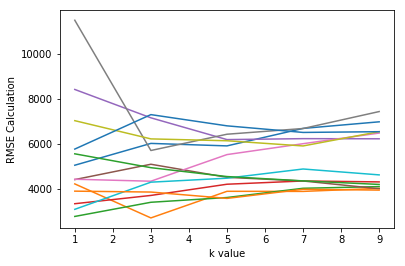

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_vals.items():
    x = [1, 3, 5, 7, 9]
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE Calculation')



We can see that there is a group of features that may work better for modeling price better than others. 

## Modifying the Function for Multivariate Modeling

Next, we will modify the function to accept a list of columns to use as features instead of using a single feature. We will use the default k-value of 5 for now (this is also the average of the k values we tested earlier)

In [13]:
def knn_train_test(training_features, target_feature, df):
    # randomize the dataset with reproducibility
    np.random.seed(1)
    random_indexes = np.random.permutation(df.index)
    random_df = df.reindex(random_indexes)
    
    # split the dataset into training and testing sets (%75 for training, %25 for testing)
    last_training_index = int(len(random_df)*.75)
    training_set = random_df.iloc[:last_training_index]
    testing_set = random_df.iloc[last_training_index:]
    
    # define k values
    k_values = [5]
     
    # dictionary to hold our rmse values according to k value
    k_rmses = {}
    
    for k in k_values:
        # instantiate the knn model using the n_neighbors parameter
        knn = KNeighborsRegressor(n_neighbors = k)
    
        # fit the model
        knn.fit(training_set[training_features], training_set[target_feature])
    
        # make predictions
        predicted_prices = knn.predict(testing_set[training_features])
    
        # Calculate rmse
        rmse = mean_squared_error(testing_set[target_feature], predicted_prices)**(1/2)
        # update k_valuse dictionary
        k_rmses[k] = rmse
        
    return k_rmses

### Determining Average RMSE Values
To determine the best features to use in the next phase of modeling, we'll compute the average RMSE value over the 5 different k-values we calculated previously.

In [14]:
feature_avg_rmse = {}
for k, v in k_rmse_vals.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
feature_avg_rmse_series = pd.Series(feature_avg_rmse)
feature_avg_rmse_series.sort_values()

length               3593.398143
wheel_base           3754.958064
city_mpg             3860.489109
width                3990.936130
horsepower           4280.708216
curb_weight          4481.577920
highway_mpg          4725.435069
bore                 5359.819481
normalized_losses    6131.233067
compression_rate     6368.614850
peak_rpm             6583.960328
height               6843.863303
stroke               7546.619035
dtype: float64

Based on these average RMSE values, the 6 top features for predicting price are `length`, `wheel_base`, `city_mpg`, `width`, and `horsepower`. 
We will use these features to model using the best two, three, four, and five features.

In [15]:
# to hold our rmses for our best feature modeling
best_features_rmses = {}

# defining feature lists, use the function ot bodel, return the rmse value into the best_feature_rmses dictionary
best_two = ['length', 'wheel_base']
rmse_val = knn_train_test(best_two, 'price', cars_2)
best_features_rmses['best_two_features'] = rmse_val

best_three = ['length', 'wheel_base', 'city_mpg']
rmse_val = knn_train_test(best_three, 'price', cars_2)
best_features_rmses['best_three_features'] = rmse_val

best_four = ['length', 'wheel_base', 'city_mpg', 'width']
rmse_val = knn_train_test(best_four, 'price', cars_2)
best_features_rmses['best_four_features'] = rmse_val

best_five = ['length', 'wheel_base', 'city_mpg', 'width', 'horsepower']
rmse_val = knn_train_test(best_five, 'price', cars_2)
best_features_rmses['best_five_features'] = rmse_val

best_six = ['length', 'wheel_base', 'city_mpg', 'width', 'horsepower', 'curb_weight']
rmse_val = knn_train_test(best_six, 'price', cars_2)
best_features_rmses['best_six_features'] = rmse_val

best_features_rmses

{'best_two_features': {5: 3620.9752401522883},
 'best_three_features': {5: 3302.4288864719074},
 'best_four_features': {5: 3534.6595578929637},
 'best_five_features': {5: 3210.9895926461104},
 'best_six_features': {5: 3069.9301523663635}}

Based on this information, the best price predictor was calculated using the top 6 features (an RMSE of 3069). The next best two predictors were calculated using the top 5 features (an RMSE of 3210) and the top 3 features (an RMSE of 3302). 

## Optimizing Hyperparameters
For the top 3 models we identified, we'll the hyperparameter value( k-neighbors value) from 1 to 25 and plot the resulting RMSE values.
Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [16]:
def knn_train_test(training_features, target_feature, df):
    # randomize the dataset with reproducibility
    np.random.seed(1)
    random_indexes = np.random.permutation(df.index)
    random_df = df.reindex(random_indexes)
    
    # split the dataset into training and testing sets (%75 for training, %25 for testing)
    last_training_index = int(len(random_df)*.75)
    training_set = random_df.iloc[:last_training_index]
    testing_set = random_df.iloc[last_training_index:]
    
    # define k values
    k_values = [i for i in range(1, 25)]
     
    # dictionary to hold our rmse values according to k value
    k_rmses = {}
    
    for k in k_values:
        # instantiate the knn model using the n_neighbors parameter
        knn = KNeighborsRegressor(n_neighbors = k)
    
        # fit the model
        knn.fit(training_set[training_features], training_set[target_feature])
    
        # make predictions
        predicted_prices = knn.predict(testing_set[training_features])
    
        # Calculate rmse
        rmse = mean_squared_error(testing_set[target_feature], predicted_prices)**(1/2)
        # update k_valuse dictionary
        k_rmses[k] = rmse
        
    return k_rmses
                               
# Modeling over the 25 k-values for the following three feature combinations
                               # to hold our rmses for our best feature modeling
best_features_rmses = {}



best_three = ['length', 'wheel_base', 'city_mpg']
rmse_val = knn_train_test(best_three, 'price', cars_2)
best_features_rmses['best_three_features'] = rmse_val


best_five = ['length', 'wheel_base', 'city_mpg', 'width', 'horsepower']
rmse_val = knn_train_test(best_five, 'price', cars_2)
best_features_rmses['best_five_features'] = rmse_val

best_six = ['length', 'wheel_base', 'city_mpg', 'width', 'horsepower', 'curb_weight']
rmse_val = knn_train_test(best_six, 'price', cars_2)
best_features_rmses['best_six_features'] = rmse_val

best_features_rmses

{'best_three_features': {1: 3614.766275223032,
  2: 3522.14357925073,
  3: 3487.2272877549267,
  4: 3539.621377696911,
  5: 3302.4288864719074,
  6: 3238.656437013164,
  7: 3234.485292444338,
  8: 3227.8098578812237,
  9: 3246.893269302577,
  10: 3352.5275250966415,
  11: 3377.9922774153315,
  12: 3541.890708659972,
  13: 3630.7740568176955,
  14: 3701.5483925366575,
  15: 3786.2856073836097,
  16: 3705.7507280100913,
  17: 3803.8674434532923,
  18: 3868.350450244689,
  19: 3935.6115204085654,
  20: 3985.484405051432,
  21: 4006.0749811323008,
  22: 3997.20793305497,
  23: 4019.605224064196,
  24: 4043.134984782588},
 'best_five_features': {1: 2277.541123981864,
  2: 2392.6671822253,
  3: 2815.7277527804026,
  4: 3028.630536822118,
  5: 3210.9895926461104,
  6: 3402.8058198853787,
  7: 3490.702976940245,
  8: 3674.8734817004383,
  9: 3740.439813105519,
  10: 3670.7436477017645,
  11: 3720.292088281312,
  12: 3838.6248762014693,
  13: 3804.489855597627,
  14: 3870.7359512568605,
  15: 3

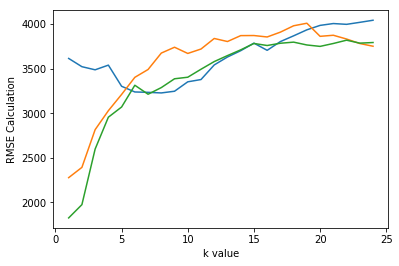

In [18]:
for k, v in best_features_rmses.items():
    x = list(v.keys())
    y = list(v.values())

    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE Calculation')
       

The blue line represents `best_three_features`.
- for this model, the optimal k-value is 8
The orange line represents `best_five_features`.
 - for this model, the optimal k-value is 1
The green line represents `best_three_features`.
- for this model the optimal k-value is 1

These three features all average around $3200.00 difference between actual and predicted prices when k=5. An error threshold was not established for this project but it seems there is room for improvement for the predictions. 

This could indicate that our algorithm is showing that few features relate to a car's price such as `length`, `wheel_base`, and `city_mpg` and that price may be better predicted using other metrics.


## Ideas for next steps:

- Explore other features such as manufacturer (`make`) and how that may relate to overall price
    - do the models we already created work better when sorted by manufacturers?
- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.